# Sampling

## Population Inference

The mayor's office has hired Flatiron Data Science Immersive students to determine a way to fix traffic congestion. A good starting point is to determine out what proportion of the population of NYC owns a car.

In order for us to make any determinations about a population, we must first get information about it.

Because it's impractical to ever usually get data about *everyone* in a population, we must take a sample.



Our sample should be:

* Randomly selected- every item should have an *equal* chance of being selected
* Representative of our population

<img src= "./resources/sample_population.jpeg" width = 400>

**Random sampling is not easy to do, let's look at an example:**

Imagine you are trying to determine what proportion of New Yorkers own a car

* Stand outside of Flatiron at 12 pm and ask random people until *n* responses


* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car



When we gather a sample, we are trying to minimize the bias of our sample while also minimizing our cost.

##### Population v Sample Terminology
Measurable characteristics of populations are called *parameters*

Measurable characteristics of a sample are called *statistics*

<img src = "./resources/pop_v_sample.png" width = 350>

## Central Limit Theorem

If we take repeated samples of a population, the sampling distribution of sample means will approximate to a normal distribution! 

## $E(\bar{x_{n}}) = \mu$

as n --> "large"


Let's look at an example taken from the ubiquitous Iris dataset. This histogram represents the distributions of sepal length:


<img src = "./resources/central_limit_theorem.gif">

### An Example
A bicycle advocacy group has come to us to see if it would make sense to increase the length of time users of Citi Bike have to ride on their bikes before they have to return them. Let's analyze a collection of Citi Bike data to determine if we should lengthen the time people have with their bikes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv('./resources/citi_bike_reduced.csv')

In [4]:
trip_durations = df['trip_duration']/60
trip_durations = trip_durations[trip_durations < 2*60]

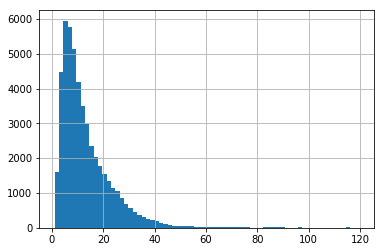

In [5]:
trip_durations.hist(bins=70)

In [6]:
trip_durations.mode()

0    5.35
dtype: float64

In [7]:
pop_mean = trip_durations.mean()
pop_std = trip_durations.std()
print('pop_mean is {} \npop_std is {}'.format(pop_mean,pop_std))

pop_mean is 13.383183916594625 
pop_std is 10.919267482302732


In [10]:
def one_sample_mean(population):
    sample = np.random.choice(population,size=200,replace=True)
    return sample.mean()

In [58]:
one_sample_mean(trip_durations)

13.570916666666667

(array([ 1.,  0.,  0.,  0.,  2.,  1.,  0.,  2.,  5.,  5.,  6., 10., 11.,
        19., 17., 25., 36., 27., 40., 38., 44., 43., 49., 58., 51., 48.,
        59., 47., 45., 56., 37., 39., 27., 30., 26., 23., 16., 14.,  7.,
         6.,  7.,  4.,  6.,  1.,  4.,  4.,  0.,  3.,  0.,  1.]),
 array([10.88033333, 10.980705  , 11.08107667, 11.18144833, 11.28182   ,
        11.38219167, 11.48256333, 11.582935  , 11.68330667, 11.78367833,
        11.88405   , 11.98442167, 12.08479333, 12.185165  , 12.28553667,
        12.38590833, 12.48628   , 12.58665167, 12.68702333, 12.787395  ,
        12.88776667, 12.98813833, 13.08851   , 13.18888167, 13.28925333,
        13.389625  , 13.48999667, 13.59036833, 13.69074   , 13.79111167,
        13.89148333, 13.991855  , 14.09222667, 14.19259833, 14.29297   ,
        14.39334167, 14.49371333, 14.594085  , 14.69445667, 14.79482833,
        14.8952    , 14.99557167, 15.09594333, 15.196315  , 15.29668667,
        15.39705833, 15.49743   , 15.59780167, 15.69817333,

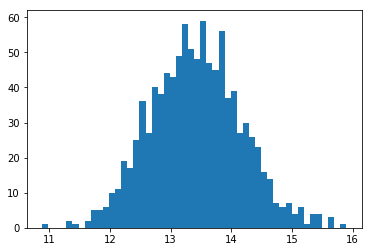

In [137]:
d = [one_sample_mean(trip_durations) for i in range(1000)]
plt.hist(d,bins=50)

In [89]:
import seaborn as sns


def central_limit_theorem_plotter(distribution,sample_size,num_samples):
    sample_means = np.zeros(num_samples)
    for idx,num in enumerate(range(num_samples)):
        sample = np.random.choice(distribution,size=sample_size,replace=True)
        sample_means[idx] = sample.mean()
    sns.distplot(sample_means,bins=80,kde=True)
    title = 'Sample Distribution n = {} and number of samples = {}, std error = {}'.format(sample_size,num_samples,pop_std/num_samples)
    print('mean = {}'.format(sample_means.mean()))
    plt.title(title)

mean = 13.380002243333333


/Users/forest.polchow/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


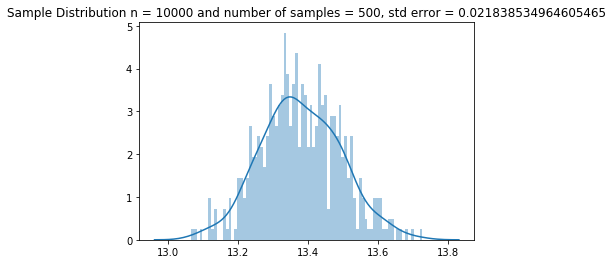

In [90]:
central_limit_theorem_plotter(trip_durations,10000,500)

/Users/forest.polchow/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mean = 13.472556666666668,  = std = 1.1846765313836143


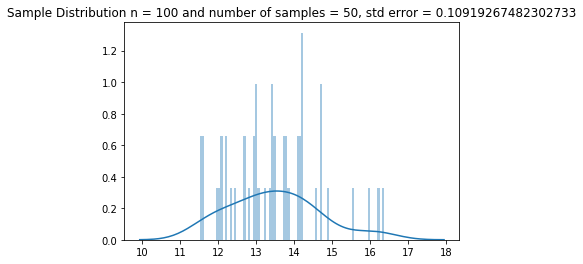

In [29]:
central_limit_theorem_plotter(100,50)

In [68]:
x = np.zeros((2,5))

In [70]:
x

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

* What happens as we increase the sample size?
* How does the height of the distribution change? Why does it change?

https://www.kaggle.com/tentotheminus9/central-limit-theorem-animation

In [138]:
exponential =np.random.exponential(scale= 1,size=1000)

(array([124.,  76.,  84.,  65.,  74.,  67.,  54.,  46.,  47.,  49.,  33.,
         33.,  24.,  30.,  19.,  18.,  14.,  14.,  14.,  16.,  11.,  14.,
          9.,   5.,   4.,   7.,   7.,   5.,   3.,   4.,   2.,   2.,   2.,
          4.,   2.,   2.,   1.,   2.,   2.,   1.,   1.,   3.,   1.,   0.,
          2.,   1.,   0.,   0.,   1.,   1.]),
 array([2.46331888e-04, 1.23577738e-01, 2.46909145e-01, 3.70240551e-01,
        4.93571958e-01, 6.16903364e-01, 7.40234770e-01, 8.63566177e-01,
        9.86897583e-01, 1.11022899e+00, 1.23356040e+00, 1.35689180e+00,
        1.48022321e+00, 1.60355462e+00, 1.72688602e+00, 1.85021743e+00,
        1.97354883e+00, 2.09688024e+00, 2.22021165e+00, 2.34354305e+00,
        2.46687446e+00, 2.59020587e+00, 2.71353727e+00, 2.83686868e+00,
        2.96020009e+00, 3.08353149e+00, 3.20686290e+00, 3.33019431e+00,
        3.45352571e+00, 3.57685712e+00, 3.70018852e+00, 3.82351993e+00,
        3.94685134e+00, 4.07018274e+00, 4.19351415e+00, 4.31684556e+00,
        4.

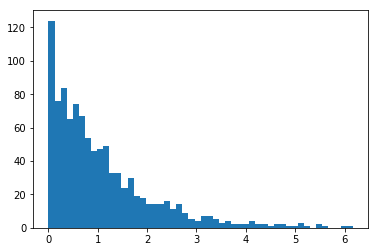

In [139]:
plt.hist(exponential,bins=50)

/Users/forest.polchow/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mean = 1.0710637877866909,  = std = 0.016410546532536888


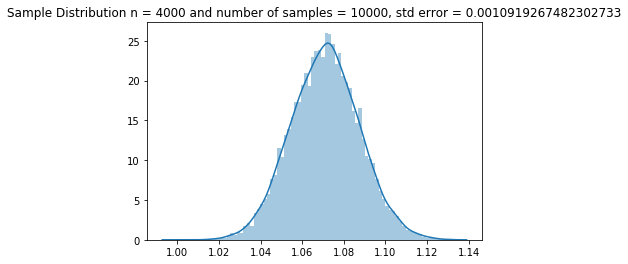

In [141]:
central_limit_theorem_plotter(exponential,4000,10000)

### Standard Error of the Mean

The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for the fact that in order to make our estimate of the $\mu$ value possible. Let's break it down:


### $\sigma _{x} = \frac{\sigma }{\sqrt{n}}$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population


If we do not know the population standard deviation, we can approximate for it by used the sample standard deviation.

### $\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

* s = sample standard deviation

How should sample size influence standard error of the mean?



Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.

<img src = "./resources/sample_size_diminishing.png" width = "300">

### Confidence Intervals

<img src = "./resources/normal_distribution_confidence_intervals.png">

Point estimate +/- margin of error

**KEY POINT** : Our level of confidence that if we obtained a sample of equal size, our sample interval would contain the population mean.

**IT IS NOT** : The probability that the population mean lies within our sample interval. <-- this implies that there is an element of probability related to having the population mean within our sample. It either is or it is not.

A confidence interval is composed of these components:
<img src="./resources/confidence_interval.png" width="500">

#### Example 1:
Let's construct an 80% and 95% confidence interval for one of our samples: 



In [59]:
import scipy.stats as scs
sample = np.random.choice(trip_durations,size=200)
sample_size = 200
sample_mean = sample.mean()
z_critical_upper = scs.norm.ppf(0.975)
# z_critical_lower = scs.norm.ppf(0.025)
margin_of_error = z_critical_upper * (pop_std/(sample_size**0.5))
confidence_inderval = (sample_mean - margin_of_error , sample_mean + margin_of_error)

In [60]:
confidence_inderval

(11.393694543717956, 14.420305456282044)

#### Example 2:
The EPA considers indoor radon levels above 4 picocuries per liter (pCi/L) of air to be high enough to warrant amelioration efforts.  Tests in a sample of 200 Centre County Pennsylvania homes found 127 (63.5%) of these sampled households to have indoor radon levels above 4 pCi/L.  What is the population value being estimated by this sample percentage? What is the standard error of the corresponding sample proportion? What is the 95% confidence interval?"

In [22]:
p = 0.635
std_error = (p*(1-p))/(200**0.5)

critical_value = scs.norm.ppf(0.975)
margin_of_error = critical_value*std_error
confidence_interval = (p - margin_of_error, p + margin_of_error)
print(confidence_interval)

(0.6028782141111354, 0.6671217858888646)


## Student's T Distribution

We can use the normal distribution when either:
* the population standard deviation is known
* the sample size is greater than 100.

If neither of those hold true, we need to use the T-distribution. The t-distribution is wider and has different critical values for different sample sizes.


<img style="float: left;" src = "./resources/William_Sealy_Gosset.jpg" width = 200>
<img style="float: right;" src = "./resources/z_vs_t.gif">

PDF of T-distribution: ${\frac {\Gamma \left({\frac {\nu +1}{2}}\right)}{{\sqrt {\nu \pi }}\,\Gamma \left({\frac {\nu }{2}}\right)}}\left(1+{\frac {x^{2}}{\nu }}\right)^{-{\frac {\nu +1}{2}}}\!$

parameter: $\nu > 0$ where $\nu$ is degrees of freedom (n-1)

<img src="./resources/z_to_t.png" width="400">

#### T-Distribution Example

1. You are inspecting a hardware factory and want to construct a 90% confidence interval of acceptable screw lengths. You draw a sample of 30 screws and calculate their mean length as 4.8 centimeters and the standard deviation as 0.4 centimeters. What are the bounds of your confidence interval?



In [1]:
import scipy.stats as scs
n = 30
mean = 4.8
t_value = scs.t.ppf(0.95,n-1)
margin_error = t_value* 0.4/(n**0.5)
confidence_interval = (mean - margin_error, mean + margin_error)

In [2]:
confidence_interval

(4.6759133066001235, 4.924086693399876)